### Requirements:
1. Obtain data from an API or web-scraping.
You are epxected to work on some form of text data.
Your goal is to uncover underlying clusters (social communities, market patters) etc., using unsupervised learning.
2. You can use any method; clustering, sentiment analysis, dimensionality reduction, pretrained models, word-embeddings, network embeddings, etc.
3. Create a visualization in 2d or 3d of the data with the clusters you found tagged.
4. Analyze the produced clusters and use them to provide a short explanation of what you found.

### Data Web-Scraping

In [1]:
import requests
from bs4 import BeautifulSoup

# URL of the page 
search_query = 'python programming'
url = f'https://openlibrary.org/search?q={search_query}'

# Send a GET request to the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content of the page with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Example: Extract the titles and authors of the books
    book_titles = soup.find_all('h3', class_='booktitle')
    book_authors = soup.find_all('span', class_='bookauthor')

    print("Books found:")
    for title, author in zip(book_titles, book_authors):
        print(f"Title: {title.get_text(strip=True)}, Author: {author.get_text(strip=True)}")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

Books found:
Title: Core Python programming, Author: byWesley Chun
Title: Black Hat Python: Python Programming for Hackers and Pentesters, Author: byJustin SeitzandTim Arnold
Title: Python Programming: Python Programming for Intermediates, Author: byAdam Stewart
Title: Python Programming: Python Programming for Beginners, Python Programming for Intermediates, Author: bySarah Stewart
Title: Python Programming Crash Course: Python Programming for Beginners, Author: byAlex Jaxson
Title: Core Python Programming, Author: byR. Nageswara Rao
Title: Python Programming, Author: byReema Thareja
Title: Python Programming: A Modular Approach, Author: byNaveen ,Kumar and Taneja Sheetal
Title: Python programming: an introduction to computer science, Author: byJohn M. Zelle
Title: Python Programming: Introduction, Author: byLogical Operations Staff
Title: Python Programming: Python Programming for Complete Novices, Author: byScott Bernard
Title: Python Programming: Explore Python Programming Exercise

In [2]:
import requests
from bs4 import BeautifulSoup

# URL of the page
search_query = 'python programming'
url = f'https://openlibrary.org/search?q={search_query}'

# Send a GET request to the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content of the page with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract book titles and authors
    book_titles = soup.find_all('h3', class_='booktitle')
    book_authors = soup.find_all('span', class_='bookauthor')

    books = [{'title': title.get_text(strip=True), 'author': author.get_text(strip=True)} for title, author in zip(book_titles, book_authors)]

    for book in books:
        print(f"Title: {book['title']}, Author: {book['author']}")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

Title: Core Python programming, Author: byWesley Chun
Title: Black Hat Python: Python Programming for Hackers and Pentesters, Author: byJustin SeitzandTim Arnold
Title: Python Programming: Python Programming for Intermediates, Author: byAdam Stewart
Title: Python Programming: Python Programming for Beginners, Python Programming for Intermediates, Author: bySarah Stewart
Title: Python Programming Crash Course: Python Programming for Beginners, Author: byAlex Jaxson
Title: Core Python Programming, Author: byR. Nageswara Rao
Title: Python Programming, Author: byReema Thareja
Title: Python Programming: A Modular Approach, Author: byNaveen ,Kumar and Taneja Sheetal
Title: Python programming: an introduction to computer science, Author: byJohn M. Zelle
Title: Python Programming: Introduction, Author: byLogical Operations Staff
Title: Python Programming: Python Programming for Complete Novices, Author: byScott Bernard
Title: Python Programming: Explore Python Programming Exercises and Solutio

### TF-IDF vectorization and K-means clustering

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Titles Extraction
titles = [book['title'] for book in books]

# Titles Vectorization 
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(titles)

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# cluster labeling
df = pd.DataFrame(books)
df['cluster'] = kmeans.labels_

# Printing
for cluster in range(5):
    print(f"Cluster {cluster}:")
    TitlesOfCluster = df[df['cluster'] == cluster]['title'].values
    for title in TitlesOfCluster:
        print(f" - {title}")

E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
 - Python Programming: Python Programming for Intermediates
 - Python Programming: Python Programming for Beginners, Python Programming for Intermediates
 - Python Programming Crash Course: Python Programming for Beginners
 - Python Programming
 - Python Programming: A Modular Approach
 - Python Programming: Python Programming for Complete Novices
 - Python Programming: Explore Python Programming Exercises and Solutions
 - Python Programming
 - Python programming in context
 - Python Programming: Python Programming Programming for the Absolute Beginner
 - Python Programming: The Beginner's Guide to Python Programming
 - Python Programming: Learn to Program Python
 - Python Programming: Hand Book
Cluster 1:
 - Learning Python
Cluster 2:
 - Python programming: an introduction to computer science
 - Python Programming: Introduction
Cluster 3:
 - Core Python programming
 - Core Python Programming
 - Python Programming: Master the Core Concepts of Python Programming
Cluster 4:
 -

### Visualization

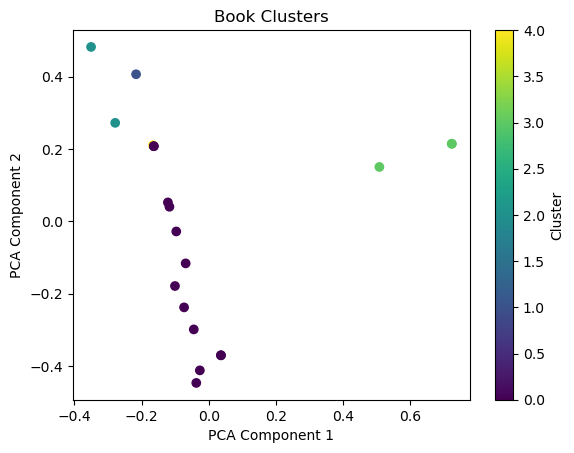

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Dimensionality reduction
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X.toarray())

# Plotting
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Book Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

### Analysis and Interpretation

There are 5 clusters:

The first cluster includes Python Programming for Beginners, Intermediates.
The second cluster includes Learning Python.
The third cluster includes introduction to Python programming.
The fourth cluster includes Core Python programming.
The fifth cluster includes Python Programming for Hackers.

The variety within the category of the first cluster is the most and the the second and the fifth clusters are the leasts, therefore the distribution and popularity of the topics in the first cluster is the highest and vice versa for the second and the fifth clusters.